In [6]:
import emoji 
import json
import datetime
import re
from collections import Counter
import timeit
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#import ijson

file_path = "data_tweets_with_emoji_json.txt"

In [7]:
### läd Datei
def get_tweets(filename):
    for line in open(filename, encoding='utf-8'):
        yield json.loads(line)
        # yield print(twitter.Status.NewFromJsonDict(json.loads(line)))


def get_full_tweets(filename):
    for line in open(filename, encoding='utf-8'):
        yield json.loads(line)
        
data = get_full_tweets("C:\\MSc\\data_tweets_with_emoji_json.txt")

In [8]:
df = pd.DataFrame(data, columns=['id_str','text','in_reply_to_user_id_str'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392017 entries, 0 to 392016
Data columns (total 3 columns):
id_str                     392017 non-null object
text                       392017 non-null object
in_reply_to_user_id_str    10398 non-null object
dtypes: object(3)
memory usage: 9.0+ MB


In [10]:
def extract_chars(my_str):     
    return ''.join([c for c in my_str if not(c in emoji.UNICODE_EMOJI)])

def anonymize_username(my_str):
    anonymized_text = ['@username' if x.startswith('@') else x for x in list(my_str.split())]
    return ' '.join(anonymized_text)

def anonymize_hashtag(my_str): 
    return ' '.join(['#hashtag' if x.startswith('#') else x for x in list(my_str.split())])

def delete_links(my_str): 
    return ' '.join(['' if x.startswith('https') else x for x in list(my_str.split())])
# to do: hashtags und links entfernen

df_clean_text = df['text'].apply(lambda x: delete_links(anonymize_hashtag(anonymize_username(extract_chars(x)))))

In [11]:
def extract_emojis(my_str):
    return ''.join(c for c in my_str if c in emoji.UNICODE_EMOJI)

df_extr_emojis = df['text'].apply(lambda x: extract_emojis(x))

In [12]:
# unhide the strings in jupyter notebook
pd.options.display.max_rows
pd.set_option('display.max_colwidth', -1)

# assign all new functions to df

new_df = df.assign(clean_text = df_clean_text, extr_emojis = df_extr_emojis) # , langid = df_langid
new_df.head()

,id_str,text,in_reply_to_user_id_str,clean_text,extr_emojis
0,689736119580233728,"LoL 😂 @ West Covina, California https://t.co/ylNndaC0ls",None,"LoL @username West Covina, California",😂
1,812015924374974464,Things got a little festive at the office 🎄#christmas2016 @ RedRock… https://t.co/mE8HmWpJ40,None,Things got a little festive at the office #hashtag @username RedRock…,🎄
2,801647284685373440,Step out and explore. #❤️ @ Ellis Island Cafe https://t.co/mVOVCPXQRQ,None,Step out and explore. #hashtag @username Ellis Island Cafe,❤
3,781871095351828480,📸 @vinniehatestyle @ Cathedral Preparatory School https://t.co/SNLPazrrk2,None,@username @username Cathedral Preparatory School,📸
4,714690241370660865,RuPaul's Drag Race bingo fun. Drag Queens be SEXY! #rupaulsdragrace @fioelly abwyman 😘 #la… https://t.co/VC2M2uWmlp,None,RuPaul's Drag Race bingo fun. Drag Queens be SEXY! #hashtag @username abwyman #hashtag,😘


In [13]:
# rows only with emoji

# len(df_emoji_rows.index) = 194625

df_emoji_rows = new_df[new_df.extr_emojis != '']
df_emoji_rows.head()

,id_str,text,in_reply_to_user_id_str,clean_text,extr_emojis
0,689736119580233728,"LoL 😂 @ West Covina, California https://t.co/ylNndaC0ls",None,"LoL @username West Covina, California",😂
1,812015924374974464,Things got a little festive at the office 🎄#christmas2016 @ RedRock… https://t.co/mE8HmWpJ40,None,Things got a little festive at the office #hashtag @username RedRock…,🎄
2,801647284685373440,Step out and explore. #❤️ @ Ellis Island Cafe https://t.co/mVOVCPXQRQ,None,Step out and explore. #hashtag @username Ellis Island Cafe,❤
3,781871095351828480,📸 @vinniehatestyle @ Cathedral Preparatory School https://t.co/SNLPazrrk2,None,@username @username Cathedral Preparatory School,📸
4,714690241370660865,RuPaul's Drag Race bingo fun. Drag Queens be SEXY! #rupaulsdragrace @fioelly abwyman 😘 #la… https://t.co/VC2M2uWmlp,None,RuPaul's Drag Race bingo fun. Drag Queens be SEXY! #hashtag @username abwyman #hashtag,😘


In [14]:
# percantage of TOP 20 Emoji

series_emoji_top20 = df_emoji_rows.extr_emojis.value_counts().head(20)
df_emoji_top20 = series_emoji_top20.to_frame()
df_emoji_top20['emoji'] = df_emoji_top20.index
df_emoji_top20['Anzahl'] = df_emoji_top20['extr_emojis']
df_emoji_top20 = df_emoji_top20.drop(columns = 'extr_emojis')
df_emoji_top20.reset_index(inplace=True)
df_emoji_top20 = df_emoji_top20.drop(columns = 'index')
df_emoji_top20['Prozent'] = df_emoji_top20['Anzahl']/df_emoji_top20['Anzahl'].sum() * 100
df_emoji_top20_transpose = df_emoji_top20.transpose()
df_emoji_top20

,emoji,Anzahl,Prozent
0,❤,93270,23.792336
1,😍,39388,10.047523
2,😂,26317,6.713229
3,💕,24849,6.338756
4,😊,21511,5.487262
5,😎,20055,5.115850
6,📷,16379,4.178135
7,💙,14751,3.762847
8,✨,14616,3.728410
9,😘,13449,3.430719


Text(0,0.5,'Anzahl')

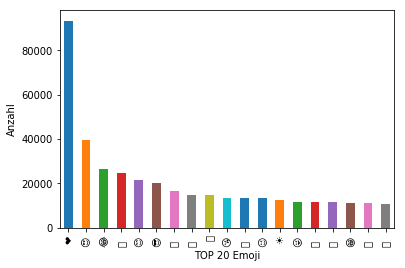

In [16]:
# vorkommen aller emoji
df_emoji_rows.extr_emojis.value_counts().head(20).plot.bar()
plt.xlabel('TOP 20 Emoji')
plt.ylabel('Anzahl')

# plt.savefig('df_barbieri_vorkommen_emoji_alle.pdf', bbox_inches='tight')